This section imports the libraries used for the simulation. matplotlib.pyplot is used for creating plots to visualize the results of the bandit algorithms. numpy provides random number generation and array manipulations. tqdm is used for displaying progress bars during the simulation. 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

The Bandit class simulates a multi-armed bandit problem. The class initialize with multiple parameters: number of arms (k_arm), the exploration rate (epsilon), the initial estimated values (initial), and the step size for updating estimates (step_size).
The reset function reinitialize the bandit’s state for each simulation run.
The act function selects an action based on an ε-greedy strategy.
The step function performs the chosen action, receives a reward, and updates the action’s estimated value accordingly.

In [15]:
class Bandit:
    def __init__(self, k_arm=10, epsilon=0., initial=0., step_size=0.1):
        self.k = k_arm
        self.step_size = step_size
        self.epsilon = epsilon
        self.initial = initial
        
    def reset(self):
        self.q_true = np.random.randn(self.k)  # True value of each action
        self.q_estimation = np.zeros(self.k) + self.initial  # Estimated values of actions
        self.action_count = np.zeros(self.k)  # Count of times each action has been selected
        self.best_action = np.argmax(self.q_true)  # The best action based on true values
        self.time = 0
        
        
    def act(self):
        if np.random.rand() <= self.epsilon:  # Choose a random action
            return np.random.choice(self.k)
        return np.argmax(self.q_estimation)  # Choose the best-known action
    
    
    def step(self, action):
        reward = np.random.randn() + self.q_true[action]  # Reward generated from normal distribution around true value
        self.time += 1
        self.action_count[action] += 1  # Increment the count of the selected action
        # Update the estimated value of the action using the step size
        self.q_estimation[action] += self.step_size * (reward - self.q_estimation[action])
        return reward

The simulate function runs the simulations for multiple runs and time steps. It initializes arrays to store rewards and track how often the optimal action is selected. For each bandit, the function resets the bandit’s state at the start of each run, then chooses actions based on the bandit’s strategy, then calculate rewards, lastly checks if the chosen action was optimal. After completing all runs, the function will calculate mean percentage of optimal actions selected. 

In [16]:
# Function to simulate the performance of different bandit strategies
def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))  # To store rewards for each bandit, run, and time step
    best_action_counts = np.zeros(rewards.shape)  # To track how often the best action is selected

    # Loop through each bandit configuration
    for i, bandit in enumerate(bandits):
        # Repeat the simulation for each run
        for r in trange(runs, desc=f'Simulating bandit {i + 1}'):
            bandit.reset()  # Reset the bandit to its initial state
            # Simulate each time step within the current run
            for t in range(time):
                action = bandit.act()  # Choose an action based on the band's strategy
                reward = bandit.step(action)  # Take the action and receive a reward
                rewards[i, r, t] = reward  # Store the received reward
                # Check if the selected action was the best action
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1

    # Calculate the mean percentage of optimal actions selected over all runs
    mean_best_action_counts = best_action_counts.mean(axis=1)
    return mean_best_action_counts

The figure_2_3 function plots the performance of different bandit strategies by showing the percentage of optimal actions selected over time. The plot includes labels, titles, and a formatted y-axis to display percentages.

In [17]:
# Function to plot the results of the bandit simulations
def figure_2_3(runs=2000, time=1000):
    # Create a list of bandit configurations with different strategies
    bandits = [
        Bandit(epsilon=0, initial=5, step_size=0.1),  # Bandit with no exploration and optimistic initial value
        Bandit(epsilon=0.1, initial=0, step_size=0.1)  # Bandit with some exploration and neutral initial value
    ]

    # Simulate the performance of the bandits
    best_action_counts = simulate(runs, time, bandits)

    # Plot the percentage of optimal actions taken over time
    plt.plot(best_action_counts[0], label='Optimistic, greedy\n$Q_1 = 5, \epsilon = 0$', color='deepskyblue')  # First bandit
    plt.plot(best_action_counts[1], label='Realistic, $\epsilon$-greedy\n$Q_1 = 0, \epsilon = 0.1$', color='gray')  # Second bandit
    plt.xlabel('Steps')  # Label for the x-axis
    plt.ylabel('% Optimal action')  # Label for the y-axis
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
    plt.xlim(1, 1000)  # Set x-axis limits from 1 to 1000 steps
    # Format y-axis as percentages
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}%'))
    plt.legend(loc='lower right')  # Display the legend at the lower right corner
    plt.title('Comparison of Bandit Algorithms')  # Plot title
    
    
    plt.savefig('Figure 2.3.png')  # Save the plot as a PNG file
    plt.show()  # Display the plot


Calling the figure_2_3 function to generate a figure of the comparison

Simulating bandit 2: 100%|██████████| 2000/2000 [00:08<00:00, 235.10it/s]


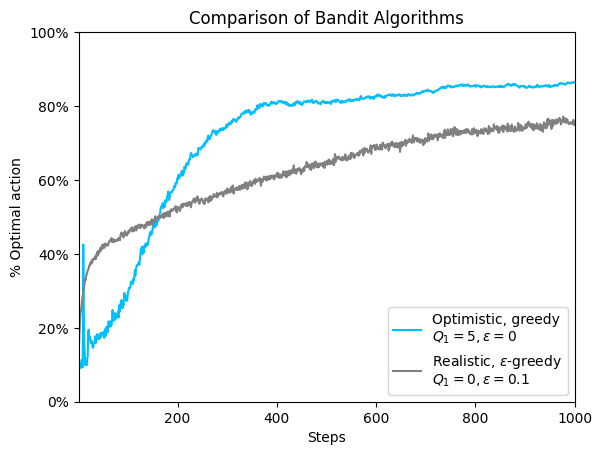

In [18]:
# Plot figure 2.3
figure_2_3()